In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhavanakatta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavanakatta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Create sample data
data = {
    'tweet_text': [
        'Just visited the Empire State Building! Amazing view of NYC #NewYork',
        'Golden Gate Bridge is beautiful today! Love SF weather #SanFrancisco',
        'Chicago deep dish pizza is the best! #WindyCity',
        'South Beach vibes are amazing! Miami living #MiamiBeach',
        'Space Needle looking gorgeous in the sunset #Seattle',
        'Times Square is packed tonight! NYC energy',
        'Enjoying clam chowder at Fisherman\'s Wharf #SF',
        'Lake Michigan view is spectacular today #Chicago',
        'Art Deco buildings in Miami Beach are incredible',
        'Pike Place Market is busy this morning #Seattle'
    ],
    'user_description': [
        'New Yorker, coffee lover, tech enthusiast',
        'Bay Area native, foodie, outdoor enthusiast',
        'Chicago sports fan, pizza lover',
        'Miami beach life, Latin food lover',
        'Seattle tech worker, rain lover',
        'NYC lifestyle blogger',
        'San Francisco explorer',
        'Chicago music lover',
        'Miami fashion blogger',
        'Seattle coffee addict'
    ],
    'location': [
        'New York', 'San Francisco', 'Chicago', 'Miami',
        'Seattle', 'New York', 'San Francisco', 'Chicago',
        'Miami', 'Seattle'
    ]
}

In [4]:
# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print("Sample Data:")
df.head()

Sample Data:


,tweet_text,user_description,location
0,Just visited the Empire State Building! Amazin...,"New Yorker, coffee lover, tech enthusiast",New York
1,Golden Gate Bridge is beautiful today! Love SF...,"Bay Area native, foodie, outdoor enthusiast",San Francisco
2,Chicago deep dish pizza is the best! #WindyCity,"Chicago sports fan, pizza lover",Chicago
3,South Beach vibes are amazing! Miami living #M...,"Miami beach life, Latin food lover",Miami
4,Space Needle looking gorgeous in the sunset #S...,"Seattle tech worker, rain lover",Seattle


In [5]:
# Function to preprocess text
def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove numbers and special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenization and stop words removal
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

In [6]:
# Apply preprocessing to tweet text and user descriptions
df['processed_tweet'] = df['tweet_text'].apply(preprocess_text)
df['processed_description'] = df['user_description'].apply(preprocess_text)

# Combine processed text features
df['combined_text'] = df['processed_tweet'] + ' ' + df['processed_description']

# Display preprocessed data
print("\nPreprocessed Data:")
df[['combined_text', 'location']].head()

# Create TF-IDF vectorizer and Random Forest pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2)
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        random_state=42
    ))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['combined_text'],
    df['location'],
    test_size=0.2,
    random_state=42
)

# Train the model
pipeline.fit(X_train, y_train)
# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print("\nModel Performance:")
print(classification_report(y_test, y_pred))


Preprocessed Data:

Model Performance:
               precision    recall  f1-score   support

      Chicago       0.00      0.00      0.00       0.0
        Miami       0.00      0.00      0.00       1.0
     New York       0.00      0.00      0.00       0.0
San Francisco       0.00      0.00      0.00       1.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0



/Users/bhavanakatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhavanakatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhavanakatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

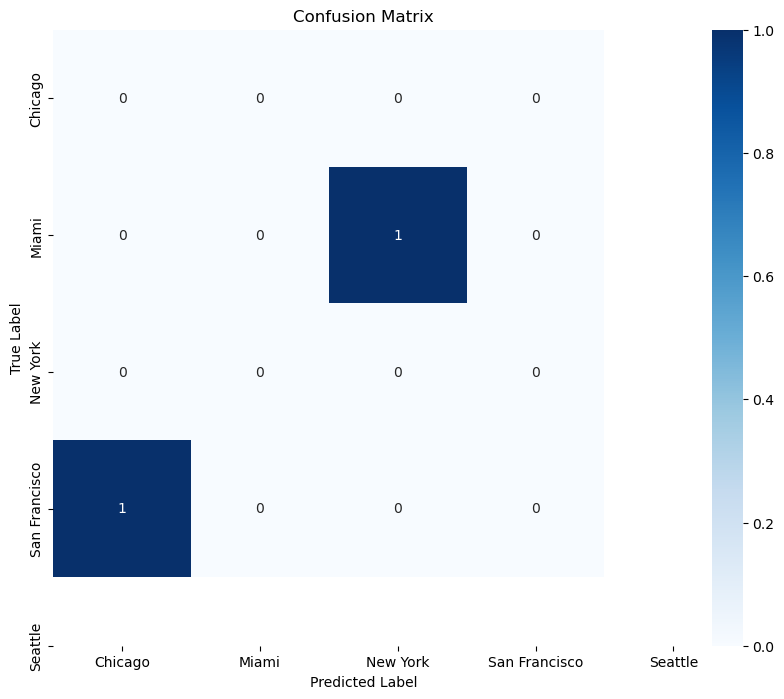

In [7]:
# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Test Predictions:

Tweet: Statue of Liberty is amazing! Love this city
User Description: Food and culture enthusiast
Predicted Location: New York
Confidence: 0.38

Tweet: Beautiful day at Pier 39 watching the sea lions
User Description: Tech worker, nature lover
Predicted Location: Seattle
Confidence: 0.35


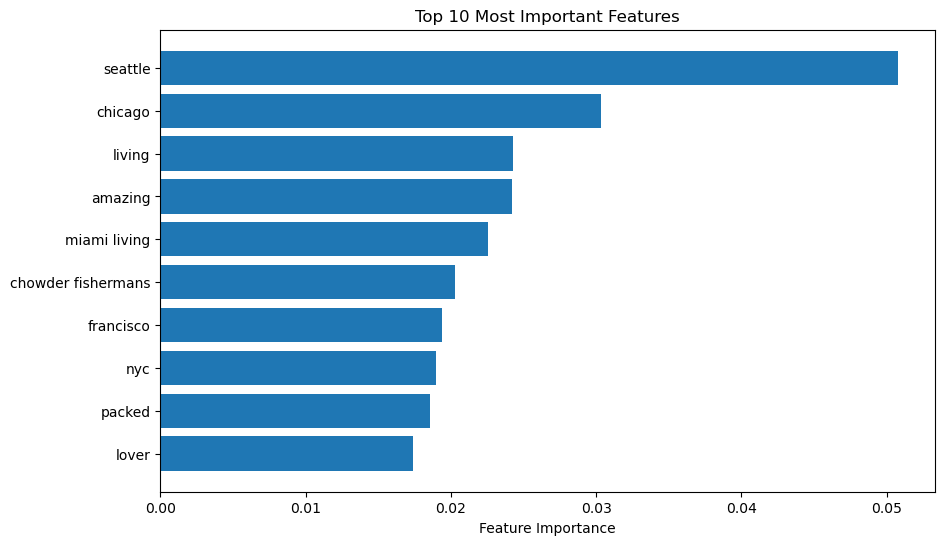

In [8]:
# Function to predict location for new tweets
def predict_location(tweet_text, user_description=''):
    """Predict location based on tweet text and user description"""
    # Preprocess input
    processed_tweet = preprocess_text(tweet_text)
    processed_description = preprocess_text(user_description)
    combined_text = processed_tweet + ' ' + processed_description
    
    # Make prediction
    prediction = pipeline.predict([combined_text])[0]
    probabilities = pipeline.predict_proba([combined_text])[0]
    confidence = max(probabilities)
    
    return {
        'predicted_location': prediction,
        'confidence': confidence
    }

# Example predictions
test_cases = [
    {
        'tweet': 'Statue of Liberty is amazing! Love this city',
        'description': 'Food and culture enthusiast'
    },
    {
        'tweet': 'Beautiful day at Pier 39 watching the sea lions',
        'description': 'Tech worker, nature lover'
    }
]

print("\nTest Predictions:")
for case in test_cases:
    result = predict_location(case['tweet'], case['description'])
    print(f"\nTweet: {case['tweet']}")
    print(f"User Description: {case['description']}")
    print(f"Predicted Location: {result['predicted_location']}")
    print(f"Confidence: {result['confidence']:.2f}")

# Feature importance analysis
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Most Important Features')
plt.barh(range(10), importances[indices])
plt.yticks(range(10), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()